In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [140]:
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [21]:
ads_data = pd.read_csv('ads_data.csv')
ads_clients = pd.read_csv('ads_clients_data.csv')

In [8]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [11]:
ads_clients.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [189]:
# Запишем в новую переменную датафрейм с количеством событий (click, veiw) по каждому объявлению
clicks_and_views = ads_data \
    .groupby(['ad_id', 'event']) \
    .agg({'platform': 'count'}) \
    .reset_index()

clicks_and_views

,ad_id,event,platform
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [41]:
# Сделаем сводную таблицу, чтобы событий (click, veiw) стали колонками
clicks_and_views_piv = clicks_and_views.pivot(index='ad_id', columns='event', values='platform').fillna(0)
clicks_and_views_piv

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,0.0,156.0
122023,0.0,68.0


In [51]:
# Посчитаем среднее количество событий по каждому событию
print(round(clicks_and_views_piv.click.mean()), '- среднее количество кликов')
print(round(clicks_and_views_piv.view.mean()), '- среднее количество просомтров')

113 - среднее количество кликов
923 - среднее количество просомтров


In [237]:
# Найдем среднее количество показов на 1 объявление по дням
mean_views_by_date = ads_data \
    .query('event == "view"') \
    .groupby(['ad_id', 'date'], as_index=False) \
    .agg({'platform': 'count'}) \
    .groupby('date', as_index=False) \
    .agg({'platform': 'mean'}) \
    .rename(columns={'platform': 'Average'})

mean_views_by_date

,date,Average
0,2019-04-01,154.482270
1,2019-04-02,137.786982
2,2019-04-03,163.952778
3,2019-04-04,675.901720
4,2019-04-05,919.109677
5,2019-04-06,277.122727


In [186]:
# Посчитаем скользящее среднее по полученному результату с окном в 2 элемента
mean_views_by_date_rolling = mean_views_by_date.Average.rolling(2).mean().to_frame().reset_index()
mean_views_by_date_rolling

,index,Average
0,0,NaN
1,1,146.134626
2,2,150.869880
3,3,419.927249
4,4,797.505699
5,5,598.116202


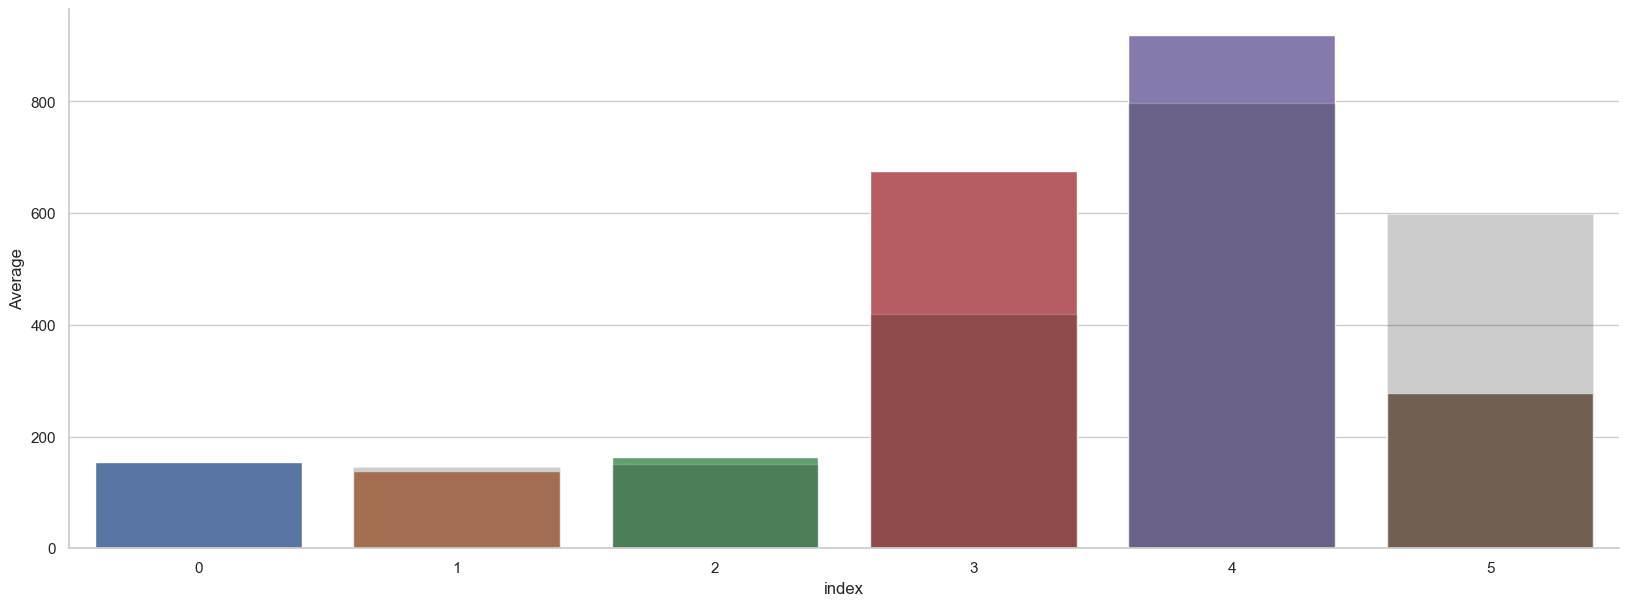

In [217]:
# Построим barplot по средним показам по дням
sns.barplot(data=mean_views_by_date, x=mean_views_by_date.date, y=mean_views_by_date.Average)
sns.barplot(data=mean_views_by_date_rolling, x='index', y='Average', color='black', alpha=0.2)
sns.despine()

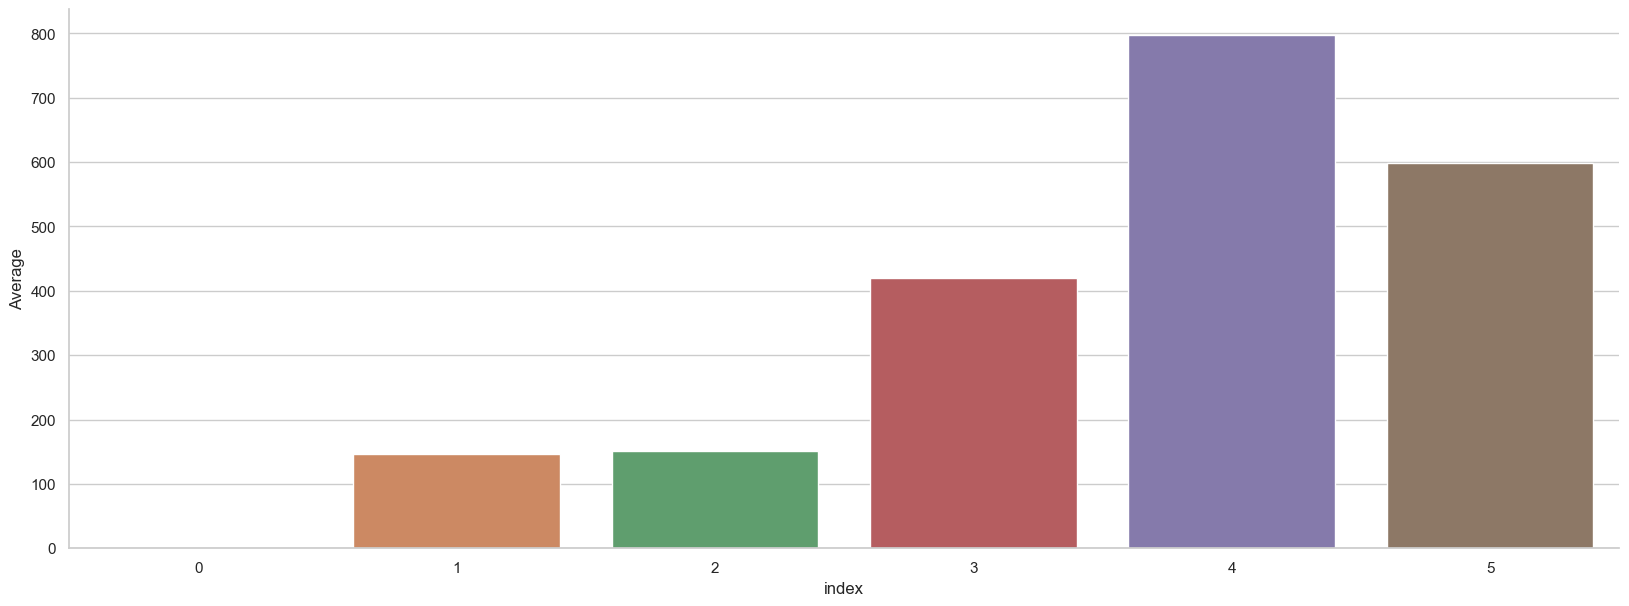

In [193]:
# Построим barplot по средним показам по дням
sns.barplot(data=mean_views_by_date_rolling, x='index', y='Average')
sns.despine()

In [238]:
# Добавим в датафрейм колонку со средним значением скользящей
mean_views_by_date['Rolling'] = mean_views_by_date_rolling.Average

In [242]:
# Создадим колонку с разницой по модулую средней и скользящей средней
mean_views_by_date['module_roll_avg'] = abs(mean_views_by_date.Average - mean_views_by_date_rolling.Average)
mean_views_by_date

,date,Average,Rolling,module_roll_avg
0,2019-04-01,154.482270,NaN,NaN
1,2019-04-02,137.786982,146.134626,8.347644
2,2019-04-03,163.952778,150.869880,13.082898
3,2019-04-04,675.901720,419.927249,255.974471
4,2019-04-05,919.109677,797.505699,121.603979
5,2019-04-06,277.122727,598.116202,320.993475


In [244]:
# Добавим в датафрейм колонку со средним значением скользящей
mean_views_by_date.module_roll_avg.max()

320.9934750733138

In [253]:
ads_clients.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [266]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [262]:
# Объединим два датафрейма в один по колонке client_union_id
ads_data_clients = ads_clients.merge(ads_data, how='inner', on='client_union_id')
ads_data_clients.head()

,date_x,client_union_id,community_id,create_date,date_y,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035


In [274]:
# Переведем соответсвующие колонки в тип даты и времени
ads_data_clients.date_x = pd.to_datetime(ads_data_clients.date_x)
ads_data_clients.date_y = pd.to_datetime(ads_data_clients.date_y)
ads_data_clients.create_date = pd.to_datetime(ads_data_clients.create_date)

In [277]:
# Создадим колонку с разницей даты, создания аккаунта клиента, с датой запуска рекламы этим клиентом
ads_data_clients['creation_to_first_add'] = ads_data_clients.date_y - ads_data_clients.create_date
ads_data_clients['creation_to_first_add']

0        98 days
1        98 days
2        98 days
3        98 days
4        98 days
           ...  
999995   72 days
999996   72 days
999997   72 days
999998   72 days
999999   72 days
Name: creation_to_first_add, Length: 1000000, dtype: timedelta64[ns]

In [285]:
# Узнаем сколько по каждому клиенту прошло времени с создания аккаунта и публикации первой рекламы
ads_data_clients \
    .groupby('client_union_id') \
    .agg({'creation_to_first_add': 'min'})

,creation_to_first_add
client_union_id,
1,98 days
9,114 days
13,66 days
16,105 days
20,32 days
...,...
122004,67 days
122013,151 days
122023,126 days


In [286]:
# Возьмем среднее значение времени с создания аккаунта и публикации первой рекламы
ads_data_clients \
    .groupby('client_union_id') \
    .agg({'creation_to_first_add': 'min'}) \
    .mean()

creation_to_first_add   124 days 09:04:43.532219570
dtype: timedelta64[ns]

In [319]:
# Отберем клиентов, у которых запуск первой рекламы произошёл не позже чем через год после регистрации. 
first_ads = ads_data_clients \
    .groupby('client_union_id') \
    .agg({'creation_to_first_add': 'min'})

first_ads

,creation_to_first_add
client_union_id,
1,98 days
9,114 days
13,66 days
16,105 days
20,32 days
...,...
122004,67 days
122013,151 days
122023,126 days


In [321]:
# Количество клиентов, сделавших свою первую реклмау до 365 дней после регистрации
first_ads.shape[0]

838

In [320]:
# Общее количество зарегистрировавшхся клиентов
ads_clients.shape[0]

122078

In [324]:
# Посчитаем конверсию
round((first_ads.shape[0] / ads_clients.shape[0]) * 100, 2)

0.69

In [397]:
# Разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления
bins = pd.to_timedelta(['0d', '30d', '90d', '180d', '365d'])
labels = ['less than 30 days', '30-90 days', '90-180 days', '180-365 days']

first_ads['delay_ads'] = pd.cut(first_ads.creation_to_first_add, bins=bins, labels=labels)
first_ads

,creation_to_first_add,delay_ads
client_union_id,,
1,98 days,90-180 days
9,114 days,90-180 days
13,66 days,30-90 days
16,105 days,90-180 days
20,32 days,30-90 days
...,...,...
122004,67 days,30-90 days
122013,151 days,90-180 days
122023,126 days,90-180 days


In [398]:
# Посчитаем количество категориальных значений по колонке delay_ads
categorical_by_days = first_ads.delay_ads.value_counts().to_frame().reset_index()
categorical_by_days

,index,delay_ads
0,90-180 days,396
1,30-90 days,263
2,180-365 days,168
3,less than 30 days,11


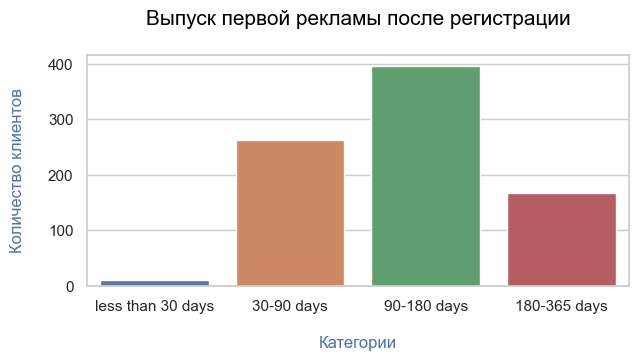

In [399]:
# Построим барплот получившегося датафрейма
plt.figure(figsize=(7,3))

sns.barplot(data=categorical_by_days, x='index', y='delay_ads')

plt.title('Выпуск первой рекламы после регистрации\n', fontsize = 15, color = 'black')
plt.xlabel('\nКатегории', fontsize = 12, color = 'b')
plt.ylabel('Количество клиентов\n', fontsize = 12, color = 'b')
plt.show()